# Homework

---

### Q1

The *Gibbs sampler* in class for the prior $p(\theta,\tau) \propto 1$ was created by alternatingly sampling from the *full conditional* $p(\theta|\tau,\textbf{x})$ *normal* and  $p(\tau|\theta,\textbf{x})$ *gamma* distributions. Create this *Gibbs sampler* so your code can be used for the sample `x = stats.norm(loc=m, scale=s).rvs(size=n)` for any arbitrary `n`, `m`, and `s`.

*Use the code below or your own code to <u>provide a demonstration of Bayesian inference<u> for this data and model specification.*

### Q2

Derive the *full conditional distributions* $p(\tau|\theta, \mathbf{x})$ and $p(\theta|\tau, \mathbf{x})$ if $p(\theta)$ is $N(\theta_0, \tau_0)$ and $p(\tau) \propto \tau^{\frac{\alpha}{2}-1} e^{- \frac{\lambda}{2} \tau}$. 

*Explain how to equate $\alpha$ and $\lambda$ with controlling the amount and nature of information the prior contributes to the posterior. How can we interpret these as controlling a "number of data points" contributed by the prior relative to the number of data points contributed to the posterior through the likelihoood?*

Create an updated version of the *Gibbs sampler* for $N(\theta_0, \tau_0)$ and $\textrm{gamma}(\textrm{shape}=\frac{\alpha}{2}, \textrm{rate}=\frac{\lambda}{2})$ priors for $p(\theta)$ and $p(\tau)$ respectively. 

*Demonstrate how changing the prior hyperparameters influences the posterior relative to the sample and the likelihood.*



In [4]:
# Q1
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
# loc is mean and scale is standard deviation
n = 30; x = stats.norm(loc=0, scale=1).rvs(size=n)
C,G = 2,10000  # chains, Gibbs samples
theta,tau = np.zeros([C,G]),np.zeros([C,G])
theta[:,0] = 1000  # initialization
for c in range(C):
    for g in range(1,G):
        # https://en.wikipedia.org/wiki/Gamma_distribution
        # 1) Update tau given the previous theta (theta[c,g-1])
        SSE = np.sum((x - theta[c,g-1])**2)  # sum of squared errors
        tau[c,g] = stats.gamma.rvs(a=n/2, scale=2.0/SSE)
        # 2) Update theta given the new tau (tau[c,g])
        theta_mean = np.mean(x)
        theta_sd = np.sqrt(1.0/(tau[c,g]*n))
        theta[c,g] = stats.norm.rvs(loc=theta_mean, scale=theta_sd)
                

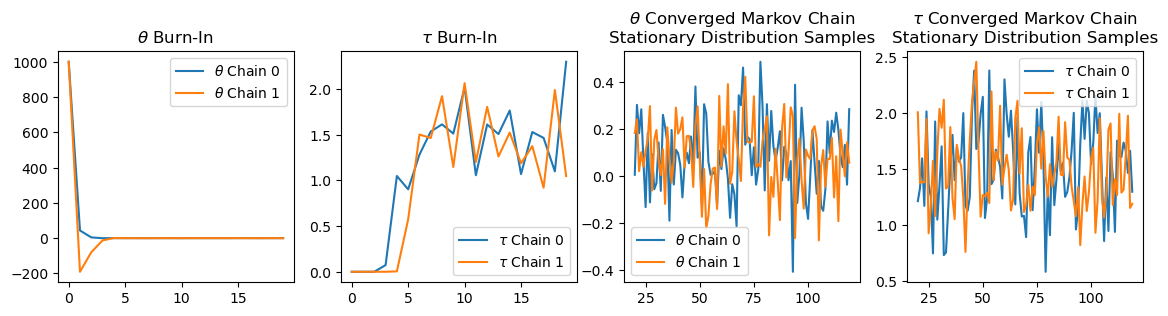

In [5]:
fig,ax = plt.subplots(1, 4, figsize=(14,3)); ax[0].set_title("$\\theta$ Burn-In"); ax[1].set_title("$\\tau$ Burn-In"); ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples"); ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
demo = 120
for c in range(C):
    ax[0].plot(theta[c,:burn], label="$\\theta$ Chain "+str(c))
    ax[1].plot(tau[c,:burn], label="$\\tau$ Chain "+str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c,burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c,burn:demo], label="$\\tau$ Chain "+str(c))
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend(); 

# Q2
## (1) Full Conditional Distributions

Suppose we have observations 
$$
\mathbf{x} = (x_1, \ldots, x_n)
$$
assumed from a normal likelihood with unknown mean 
$ \theta $ 
and unknown precision 
$ \tau $:

- $ x_i \mid (\theta, \tau) \sim \mathrm{Normal}(\theta,\, 1/\tau), \quad i = 1, \dots, n $
- $ \theta \sim \mathrm{Normal}(\theta_0,\,\tau_0) $ (mean $ \theta_0 $, variance $ \tau_0 $)
- $ \tau \;\propto\; \tau^{\,\alpha - 1}\,\exp\!\bigl(-\,\lambda\,\tau\bigr)\;\;(\text{Gamma}(\alpha,\lambda)\text{ in shape–rate form}) $

---

### (a) Conditional Distribution of $ \theta $ Given $ \tau $ and $ \mathbf{x} $

**Likelihood** (treating $ \tau $ as known):

$$
p(\mathbf{x} \mid \theta,\tau) \;\propto\; 
\tau^{\tfrac{n}{2}}
\exp\!\Bigl(-\tfrac{\tau}{2}\,\sum_{i=1}^n (x_i - \theta)^2\Bigr).
$$

**Prior** on $ \theta $:

$$
\theta \sim \mathrm{Normal}(\theta_0,\,\tau_0)
\;\;\Longrightarrow\;\;
p(\theta) \;\propto\;
\exp\!\Bigl(-\,\tfrac{1}{2\,\tau_0}\,(\theta - \theta_0)^2\Bigr).
$$

**Posterior** $ p(\theta \mid \tau, \mathbf{x}) $:

It is proportional to “(likelihood) $ \times $ (prior)”,  
which remains Gaussian in $ \theta $.  
Completing the square (or using known conjugate formulas), we get:

$$
p(\theta \mid \tau,\mathbf{x})
=
\mathrm{Normal}(\mu_\theta,\;\sigma_\theta^2),
$$

where

$$
\sigma_\theta^2 
= 
\bigl(\tau\,n + \tfrac{1}{\tau_0}\bigr)^{-1},
$$

$$
\mu_\theta
=
\sigma_\theta^2
\bigl(\tau\,n\,\overline{x} \;+\; \tfrac{1}{\tau_0}\,\theta_0\bigr),
$$

and 
$$
\overline{x} = \frac{1}{n}\sum_{i=1}^n x_i.
$$

---

### (b) Conditional Distribution of $ \tau $ Given $ \theta $ and $ \mathbf{x} $

**Likelihood** (treating $ \theta $ as known):

$$
p(\mathbf{x} \mid \theta,\tau)
\;\propto\;
\tau^{\tfrac{n}{2}}
\exp\!\Bigl(-\tfrac{\tau}{2}\,\sum_{i=1}^n (x_i - \theta)^2\Bigr).
$$

**Prior** on $ \tau $:

$$
\tau^{\alpha - 1}\,\exp(-\,\lambda\,\tau)
\quad\Longrightarrow\quad
\tau \sim \mathrm{Gamma}(\alpha,\,\lambda).
$$

**Posterior** $ p(\tau \mid \theta, \mathbf{x}) $:

It is proportional to “(likelihood) $ \times $ (prior)”:

$$
p(\tau \mid \theta, \mathbf{x})
\;\propto\;
\tau^{\tfrac{n}{2} + \alpha - 1}
\exp\!\Bigl(-\,\tau\Bigl[\lambda + \tfrac{1}{2}\sum_{i=1}^n (x_i - \theta)^2\Bigr]\Bigr).
$$

Recognizable as a Gamma distribution with updated parameters:

$$
p(\tau \mid \theta, \mathbf{x})
=
\mathrm{Gamma}\!\Bigl(
  \alpha + \tfrac{n}{2},
  \;\lambda + \tfrac{1}{2}\sum_{i=1}^n (x_i - \theta)^2
\Bigr).
$$

Hence, the **full conditionals** are:

- $ \theta \mid (\tau,\mathbf{x}) \sim \mathrm{Normal}\bigl(\mu_\theta,\;\sigma_\theta^2\bigr) $
- $ \tau \mid (\theta,\mathbf{x}) \sim \mathrm{Gamma}\Bigl(\alpha + \tfrac{n}{2},\;\lambda + \tfrac{1}{2}\sum_{i=1}^n (x_i - \theta)^2\Bigr) $

---

## (2) Interpretation of $ \alpha $ and $ \lambda $

For the Gamma($ \alpha,\lambda $) prior:

- **$ \alpha $** (“shape”):  
  Interpreted as the number of “pseudo-observations” or “prior strength” for $ \tau $. A higher $ \alpha $ places more prior mass away from zero and reduces the data’s relative influence on $ \tau $.

- **$ \lambda $** (“rate”):  
  Determines the scale. A larger $ \lambda $ implies the prior expects smaller $ \tau $ (larger variance), since the Gamma mean is $ \alpha / \lambda $.

For 
$$
\theta \sim \mathrm{Normal}(\theta_0,\,\tau_0),
$$
a smaller $ \tau_0 $ indicates a tighter prior around $ \theta_0 $.  

---

## (3) Updated Gibbs Sampler

A typical **Gibbs sampling** scheme for $ (\theta,\tau) $ alternates:

1. **Sample**  
   $$ \theta^{(t+1)} \sim p(\theta \mid \tau^{(t)}, \mathbf{x}) = \mathrm{Normal}(\mu_\theta,\,\sigma_\theta^2), $$
   with

   $$
   \sigma_\theta^2
   =
   \bigl(\tau^{(t)}\,n + \tfrac{1}{\tau_0}\bigr)^{-1},
   \quad
   \mu_\theta
   =
   \sigma_\theta^2
   \bigl(\tau^{(t)}\,n\,\overline{x} + \tfrac{1}{\tau_0}\,\theta_0\bigr).
   $$

2. **Sample**  
   $$ \tau^{(t+1)} \sim p(\tau \mid \theta^{(t+1)}, \mathbf{x}) = \mathrm{Gamma}\!\Bigl(\alpha + \tfrac{n}{2},\;\lambda + \tfrac{1}{2}\sum_{i=1}^n (x_i - \theta^{(t+1)})^2\Bigr). $$

Repeat these steps. As $ t $ grows, $ (\theta^{(t)}, \tau^{(t)}) $ converges in distribution to the posterior $ p(\theta,\tau \mid \mathbf{x}). $

---

## (4) Effect of Changing Prior Hyperparameters

- **Increasing $ \alpha $**:  
  Adds “pseudo data” for $ \tau $, making the posterior for $ \tau $ less sensitive to the actual sample.

- **Increasing $ \lambda $**:  
  Pulls the prior toward smaller $ \tau $. With limited data, the posterior can strongly reflect this prior.

- **Decreasing $ \tau_0 $**:  
  Implies greater confidence that $ \theta $ is near $ \theta_0 $, narrowing the posterior of $ \theta $ around $ \theta_0 $.

Overall, **$ \alpha $, $ \lambda $, $ \tau_0 $** control how strongly the prior competes with the likelihood, thus influencing posterior estimates.


### Q3

*Read the following "conversation". My reactions to this initial text I was provied with are the colored font. Then either (A) provide an analagous derivation of this result for the multinomial-Dirichlet specification, or (B) just report that if the prior is a proper distribution then the posterior is proportional to the joint distribution as Bayes Theorem tells us and describe how one might therefore identify the exact distribution of the posterior by just looking at the joint but that finally all this is moot and beside the point because as Bayesians we're going to trade any functional forms of distributions for samples from those distributions to just make histograms and belief (credible interval probability) statements based on those anyway...*

Suppose we have the following model setup:
\begin{align*}
    x_1,...,x_n &\overset{iid}{\sim} \text{Bernoulli}(\theta)\\
    \theta &\sim \text{Beta}(a, b)
\end{align*}

The joint likelihood distribution of ~~x_1,...,x_n~~ <span style='color:red'> $\sum_i x_i$</span> $| \theta$ is $\text{Binomial}(n, \theta)$. Now, let's consider the posterior:
\begin{align*}
    p(\theta | x_1,...,x_n) &= \frac{p(x_1,...,x_n | \theta)p(\theta)}{p(x_1,...,x_n)} = \color{red}{\frac{p(\mathbf{x} | \theta)p(\theta)}{p(\mathbf{x})}}\\
    &= \frac{p(x_1,...,x_n | \theta)p(\theta)}{\int p(x_1,...,x_n | \theta )p(\theta) d\theta} = \color{red}{\frac{p(\mathbf{x}| \theta)p(\theta)}{\int p(\mathbf{x} | \theta )p(\theta) d\theta}}
\end{align*}

We can directly calculate the above if the denominator is finite. We tend to use proportionality arguments in this class, but to build some intuition <span style='color:red'>Bayes theorem is $p(\theta | \mathbf{x}) = \frac{p(\mathbf{x} | \theta )p(\theta)}{p(x)}$ and (if we know $\mathbf{x}$) then $p(\mathbf{x})$ is a constant so we must gather all $\theta$ related terms in our mathematical expression (dropping anything else which is any other constant) and see if we know of any statistical distribution that when scaled by a constant could exactly replicate our math as a function of $\theta$</span>, <span style='color:blue'>but if by "intuition" you mean the next 10 lines of derivation because you refuse to believe that the posterior is proportional to the joint (for proper priors) as Bayes Theorem claims</span> let's formally calculate that integral for the Beta-Binomial problem:

$\scriptsize
\begin{align*}
    \int p(\overset{\color{red}{\textrm{You meant } \sum_i x_i}}{x_1,...,x_n} | \theta )p(\theta) d\theta &= \int_0^1 \color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}} \overset{\color{blue}{\textrm{just this alone is a Bernoulli likelihood}}}{\theta^{\sum_i x_i}(1-\theta)^{n-\sum_i x_i}} \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\theta^{a-1}(1-\theta)^{b-1}d\theta \\
    &= \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\int_0^1 \theta^{\sum_i x_i + a - 1}(1-\theta)^{n-\sum_i x_i + b - 1}d\theta \\
    &= \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}\int_0^1 \frac{\Gamma(a+b+n)}{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}\theta^{\sum_i x_i + a - 1}(1-\theta)^{n-\sum_i x_i + b - 1}d\theta \\
    &= \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}\\& \text{ (because we have written the density formula above, which integrates to } 1)\\    
  & \color{blue}{\textrm{(But why stop there shouldn't we prove the integral is equal to 1 for "intuition"?)}}\\
    & \color{red}{\textrm{(if "intuition" may assume a density has area 1 then prove or believe Bayes Theorem)}}\\
    & \color{purple}{\textrm{Proof: $p(\theta|\mathbf{x})p(\mathbf{x}) = p(\mathbf{x}|\theta)p(\theta) \Rightarrow p(\theta|\mathbf{x}) = \frac{p(\mathbf{x}|\theta)p(\theta)}{p(\mathbf{x})}$}} \\    
    & \color{green}{\textrm{(Bayes Theorem is the formula for a posterior distribution if the prior is proper)}}\\
    & \color{blue}{\textrm{(If you believe it then the posterior is proportional to the joint and must have area 1)}}\\
    & \color{red}{\textrm{(Can you recognize what distribution for $\theta$ would be proportional to the given joint?)}}\\
    & \color{green}{\textrm{(There's only gonna be one... can't be two... can you find one distribution that does it?)}}\\
\end{align*}$

Now, we can directly plug in to our Bayes formula to directly calculate the posterior:

$\begin{align*}
    p(\theta | x_1,...,x_n) &= \frac{p(x_1,...,x_n | \theta)p(\theta)}{\int p(x_1,...,x_n | \theta )p(\theta) d\theta} \\
    &= \frac{p(x_1,...,x_n | \theta)p(\theta)}{\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}} \\
    &= \frac{\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}} \overset{\color{blue}{\textrm{just this alone is a Bernoulli likelihood}}}{\theta^{\sum_i x_i}(1-\theta)^{n-\sum_i x_i}} \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\theta^{a-1}(1-\theta)^{b-1}}{\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}} \\
    &= \frac{\theta^{\sum_i x_i}(1-\theta)^{n-\sum_i x_i} \theta^{a-1}(1-\theta)^{b-1}}{\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}} \\
    &= \frac{\Gamma(a+b+n)}{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}\theta^{\sum_i x_i + a-1}(1-\theta)^{n-\sum_i x_i+b-1} \\
    &= \text{Beta}(a+ \sum_i x_i, b + n - \sum_i x_i)
\end{align*}$

<span style='color:blue'>
So the structure of this "proof" providing the right kind of "intution" you'll apparently need to feel comfortable and safe about proportionality (if believing that the posterior is proportional to the joint as Bayes Theorem claims is a step too far for you) is...</span>

$\color{green}{\require{cancel}
\begin{align}
\frac{p(\textbf{x}|\boldsymbol{\theta})p(\boldsymbol{\theta})}{\int p(\textbf{x}|\boldsymbol{\theta})p(\boldsymbol{\theta}) d\boldsymbol{\theta}} &={} \frac{\cancel{c_xc_\theta} c p(\boldsymbol{\theta}|\textbf{x})}{\cancel{c_xc_\theta} \int c p(\boldsymbol{\theta}|\textbf{x})d \boldsymbol{\theta}}\\
&={} \frac{c p(\boldsymbol{\theta}|\textbf{x})}{ c \int \xcancel{\frac{1}{c} c} p(\boldsymbol{\theta}|\textbf{x})d \boldsymbol{\theta}} =  \frac{c p(\boldsymbol{\theta}|\textbf{x})}{ c \cancel{\int p(\boldsymbol{\theta}|\textbf{x})d \boldsymbol{\theta}}^1} = \frac{\xcancel{c} p(\boldsymbol{\theta}|\textbf{x})}{ \xcancel{c} } = p(\boldsymbol{\theta}|\textbf{x})\\
\end{align}}
$

<span style='color:blue'>
Or here's an even more direct way to show this...
</span>

$\color{red}{
\begin{align*}
\frac{p(\textbf{x}|\boldsymbol{\theta})p(\boldsymbol{\theta})}{\int p(\textbf{x}|\boldsymbol{\theta})p(\boldsymbol{\theta}) d\boldsymbol{\theta}}
 &={} \frac{p(\boldsymbol{\theta}|\textbf{x})p(\textbf{x})}{p(\textbf{x})} \\
  &={} p(\boldsymbol{\theta}|\textbf{x})
\end{align*}}
$    



We can see that when we have ~~**conjugate** priors (where the prior and posterior have the same form)~~ <u>**just any (propor) prior**</u>, the denominator in Bayes rule amounts to any normalizing constants in the likelihood and prior (that allow for the densities to integrate to 1 times the inverse of the equivalent normalizing constant of the posterior. Once we plug this back in to Bayes formula and cancel and rearrange terms, this amounts to multiplying the normalizing constant of the posterior with the portion of the posterior that relies on the parameter. This sort of derivation isn't unique to conjugate priors; as long as we can recognize the family in which the product of the prior and likelihood belong to, the integral in the denominator can be solved by simplifying the term in the integral to the precise density (which occurs by moving normalizing constants outside of the integral, and introducing the normalizing constant for that new density). This is the technique we used to solve the integral above.

As a result, we can use a proportionality argument to skip all of these mathematical derivations. If we can recognize the functional form of the product between the likelihood and prior as being in the family of another probability distribution, then that is equivalent to moving around these normalizing constants to simplify integrals.



# Q3

# (A) Multinomial–Dirichlet Derivation

Consider observations 
$$ \mathbf{x} = (x_1, \ldots, x_k) $$
that follow a multinomial distribution:

$$
x \mid p \;\sim\; \mathrm{Multinomial}\bigl(n,\,p_1,\dots,p_k\bigr),
$$

where 
$$ \sum_{i=1}^k x_i = n \quad\text{and}\quad \sum_{i=1}^k p_i = 1. $$
The likelihood is:

$$
p(x \mid p)
\;=\;
\frac{n!}{x_1!\,\cdots\,x_k!}
\;
p_1^{\,x_1}\,\cdots\,p_k^{\,x_k}.
$$

Assume a Dirichlet prior:

$$
p(p)
\;=\;
\mathrm{Dirichlet}\bigl(p \mid \alpha_1,\dots,\alpha_k\bigr)
\;=\;
\frac{1}{B(\alpha_1,\dots,\alpha_k)}
\;\prod_{i=1}^k p_i^{\,\alpha_i - 1},
$$

where

$$
B(\alpha_1,\dots,\alpha_k)
\;=\;
\frac{\prod_{i=1}^k \Gamma(\alpha_i)}{\Gamma\bigl(\sum_{i=1}^k \alpha_i\bigr)}.
$$

By Bayes' theorem, the posterior 
$$ p(p \mid x) $$
is proportional to the product of the likelihood and the prior:

$$
p(p \mid x) 
\;\propto\; 
p(x \mid p)
\;\times\;
p(p).
$$

Hence,

$$
p(p \mid x)
\;\propto\;
\prod_{i=1}^k p_i^{\,x_i}
\;\times\;
\prod_{i=1}^k p_i^{\,\alpha_i - 1}
\;=\;
\prod_{i=1}^k 
p_i^{\,x_i + \alpha_i - 1},
$$

which is recognized as a Dirichlet distribution with parameters 
$$ (\alpha_1 + x_1,\;\dots,\;\alpha_k + x_k). $$
Therefore,

$$
p \mid x 
\;\sim\;
\mathrm{Dirichlet}\!\bigl(\alpha_1 + x_1,\;\dots,\;\alpha_k + x_k\bigr).
$$

---

# (B) Posterior is Proportional to the Joint (Proper Prior Case)

Bayes' theorem states:

$$
p(\theta \mid x)
\;=\;
\frac{p(x \mid \theta)\,p(\theta)}{p(x)}.
$$

When $ p(\theta) $ is a proper distribution (i.e., it integrates to 1), the denominator

$$
p(x)
\;=\;
\int p(x \mid \theta)\,p(\theta)\,d\theta
$$

is finite and nonzero. Because $ p(x) $ is just a normalizing constant (with respect to $ \theta $), we often write:

$$
p(\theta \mid x)
\;\propto\;
p(x \mid \theta)\,\times\,p(\theta).
$$

In other words, the posterior is proportional to the joint expression 
$$ p(x \mid \theta)\,p(\theta). $$
Once we recognize this proportionality, we can identify the posterior by matching it to a known distribution family (such as Beta or Dirichlet), and the missing normalization constant is precisely what ensures the posterior integrates to 1.
